In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math
import re

In [2]:
df_eda = pd.read_csv('election-presidentielle-2017-resultats-par-bureaux-de-vote-tour-1.csv',sep=';')
url_geoloc = """https://www.data.gouv.fr/fr/datasets/r/dbe8a621-a9c4-4bc3-9cae-be1699c5ff25"""
df_geoloc = pd.read_csv(url_geoloc)

In [39]:
df_eda

,Code du département,Département,Code de la circonscription,Circonscription,Code de la commune,Commune,Bureau de vote,Inscrits,Abstentions,% Abs/Ins,...,Voix,% Voix/Ins,% Voix/Exp,Code Insee,Coordonnées,Nom Bureau Vote,Adresse,Code Postal,Ville,uniq_bdv
0,77,Seine-et-Marne,7,7ème circonscription,438,Saint-Thibault-des-Vignes,0003,1063,283,26.62,...,101,9.50,13.32,77438,"48.854007,2.668821",Groupe scolaire Marie Curie,26 rue de l'Etang de la Loy,77400.0,Saint-Thibault-des-Vignes,Groupe scolaire Marie Curie - Saint-Thibault-...
1,38,Isère,5,5ème circonscription,2,Les Adrets,0001,779,106,13.61,...,7,0.90,1.06,38002,"45.271187,5.964303",Mairie,NaN,38190.0,Les Adrets,Mairie - Les Adrets
2,52,Haute-Marne,2,2ème circonscription,331,La Porte du Der,0001,1383,295,21.33,...,198,14.32,18.66,52331,"48.476677,4.771312",Halle au blé,10 place de l’Hôtel de ville,52220.0,La Porte du Der,Halle au blé - La Porte du Der
3,2B,Haute-Corse,1,1ère circonscription,33,Bastia,0022,1175,328,27.91,...,0,0.00,0.00,2B033,NaN,NaN,NaN,NaN,NaN,NaN
4,83,Var,6,6ème circonscription,16,Le Beausset,0007,869,149,17.15,...,2,0.23,0.28,83016,"43.196343,5.796027",Réféctoire de l'école maternelle Pagnol,Avenue des Tilleuls,83330.0,Le Beausset,Réféctoire de l'école maternelle Pagnol - Le ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761800,76,Seine-Maritime,3,3ème circonscription,575,Saint-Etienne-du-Rouvray,0012,820,210,25.61,...,17,2.07,2.85,76575,"49.398043,1.077767",École Joliot Curie,Rue Guynemer,76800.0,Saint-Étienne-du-Rouvray,École Joliot Curie - Saint-Étienne-du-Rouvray
761801,74,Haute-Savoie,6,6ème circonscription,273,Sixt-Fer-à-Cheval,0001,617,102,16.53,...,14,2.27,2.78,74273,"46.057914,6.750864",Maison montagne,Place du tilleuls,74740.0,Sixt-Fer-à-Cheval,Maison montagne - Sixt-Fer-à-Cheval
761802,16,Charente,1,1ère circonscription,15,Angoulême,0002,989,280,28.31,...,140,14.16,20.14,16015,"45.648631,0.15349",Ecole maternelle Comtesse de Ségur / Salle de ...,"3, place Henri Dunant",16000.0,Angoulême,Ecole maternelle Comtesse de Ségur / Salle de ...
761803,91,Essonne,6,6ème circonscription,477,Palaiseau,0003,982,200,20.37,...,99,10.08,13.03,91477,"48.711735,2.243977",Ecole élémentaire docteur Morère,"11, rue du docteur Morère",91120.0,Palaiseau,Ecole élémentaire docteur Morère - Palaiseau


In [3]:
df_tot_votes_geocode=df_eda.groupby(['Code Insee'])[['Votants','Blancs','Nuls','Exprimés']].sum().reset_index()

In [4]:
df_eda[df_eda['Code du département']=='75'].drop_duplicates(['Code Insee'])

,Code du département,Département,Code de la circonscription,Circonscription,Code de la commune,Commune,Bureau de vote,Inscrits,Abstentions,% Abs/Ins,...,Voix,% Voix/Ins,% Voix/Exp,Code Insee,Coordonnées,Nom Bureau Vote,Adresse,Code Postal,Ville,uniq_bdv
354,75,Paris,16,16ème circonscription,56,Paris,1938,1366,293,21.45,...,3,0.22,0.28,75056,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_votes_geocode=df_eda.groupby(['Code Insee','Nom','Prénom'])['Voix'].sum().reset_index()

In [6]:
df_paris = pd.read_csv('elections-presidentielles-2017-1ertour_Paris.csv',sep=';')
df_melt=df_paris[['ID_BVOTE']+list(df_paris.columns)[16:-2]].melt(id_vars=['ID_BVOTE'],var_name='Nom',value_name='Voix')
df_melt=df_melt.merge(df_paris[['ID_BVOTE','NB_INSCR','NB_VOTANT','NB.EXPRIM']],left_on='ID_BVOTE',right_on='ID_BVOTE')
def good_insee_code(element):
    valeur = element.split('-')[0]
    if int(valeur)<10:
        code_insee='7510'+valeur
    else:
        code_insee='751'+valeur
    return code_insee
df_melt['Code Insee']=df_melt['ID_BVOTE'].apply(good_insee_code)
df_paris['Latitude']=df_paris['geo_point_2d'].apply(lambda element:element.split(',')[0]).astype(float)
df_paris['Longitude']=df_paris['geo_point_2d'].apply(lambda element:element.split(',')[1]).astype(float)
df_melt_bis = df_melt.merge(df_paris[['ID_BVOTE','Latitude','Longitude']],left_on='ID_BVOTE',right_on='ID_BVOTE')

In [7]:
df_paris['NB_VOTANT']

0       682
1      1157
2      1288
3      1165
4      1198
       ... 
891    1240
892    1273
893    1317
894    1091
895    1358
Name: NB_VOTANT, Length: 896, dtype: int64

In [8]:
df_paris_votes = df_melt_bis.drop_duplicates(['ID_BVOTE'])[['ID_BVOTE','NB_INSCR','NB_VOTANT','NB.EXPRIM','Code Insee']].groupby('Code Insee')[['NB_INSCR','NB_VOTANT','NB.EXPRIM']].sum().reset_index()

In [9]:
df_votes_candidates_paris = df_melt_bis.groupby(['Code Insee','Nom'])['Voix'].sum().reset_index().merge(df_paris_votes, left_on='Code Insee',right_on='Code Insee')

In [10]:
def transform_names(element):
    valeurs = element.split(' ')
    retour = valeurs[0]
    if len(valeurs)==3:
        retour = '{} {}'.format(valeurs[0],valeurs[1])
    return retour


In [11]:
df_votes_candidates_paris['Nom']=df_votes_candidates_paris['Nom'].apply(transform_names)

In [12]:
#df_eda[['Code Insee','Inscrits','Votants','Exprimés','Nom','Prénom','Voix']]
df_votes_candidates_paris.rename(columns={'NB_INSCR':'Inscrits','NB_VOTANT':'Votants','NB.EXPRIM':'Exprimés'},inplace=True)

In [13]:
colonnes = ['Code Insee','Inscrits','Votants','Exprimés','Nom','Voix']

In [14]:
df_base = pd.concat([df_eda[colonnes],df_votes_candidates_paris[colonnes]])

In [15]:
print(len(df_base))

762025


In [16]:
df_base_geoloc=df_base.merge(df_geoloc.rename(columns={'code_commune_INSEE':'Code Insee'})[['Code Insee','latitude','longitude','nom_commune_complet']])

In [17]:
villes_problèmes = list(set(df_geoloc['nom_commune_complet'].unique()) -set(df_base_geoloc['nom_commune_complet'].unique()))

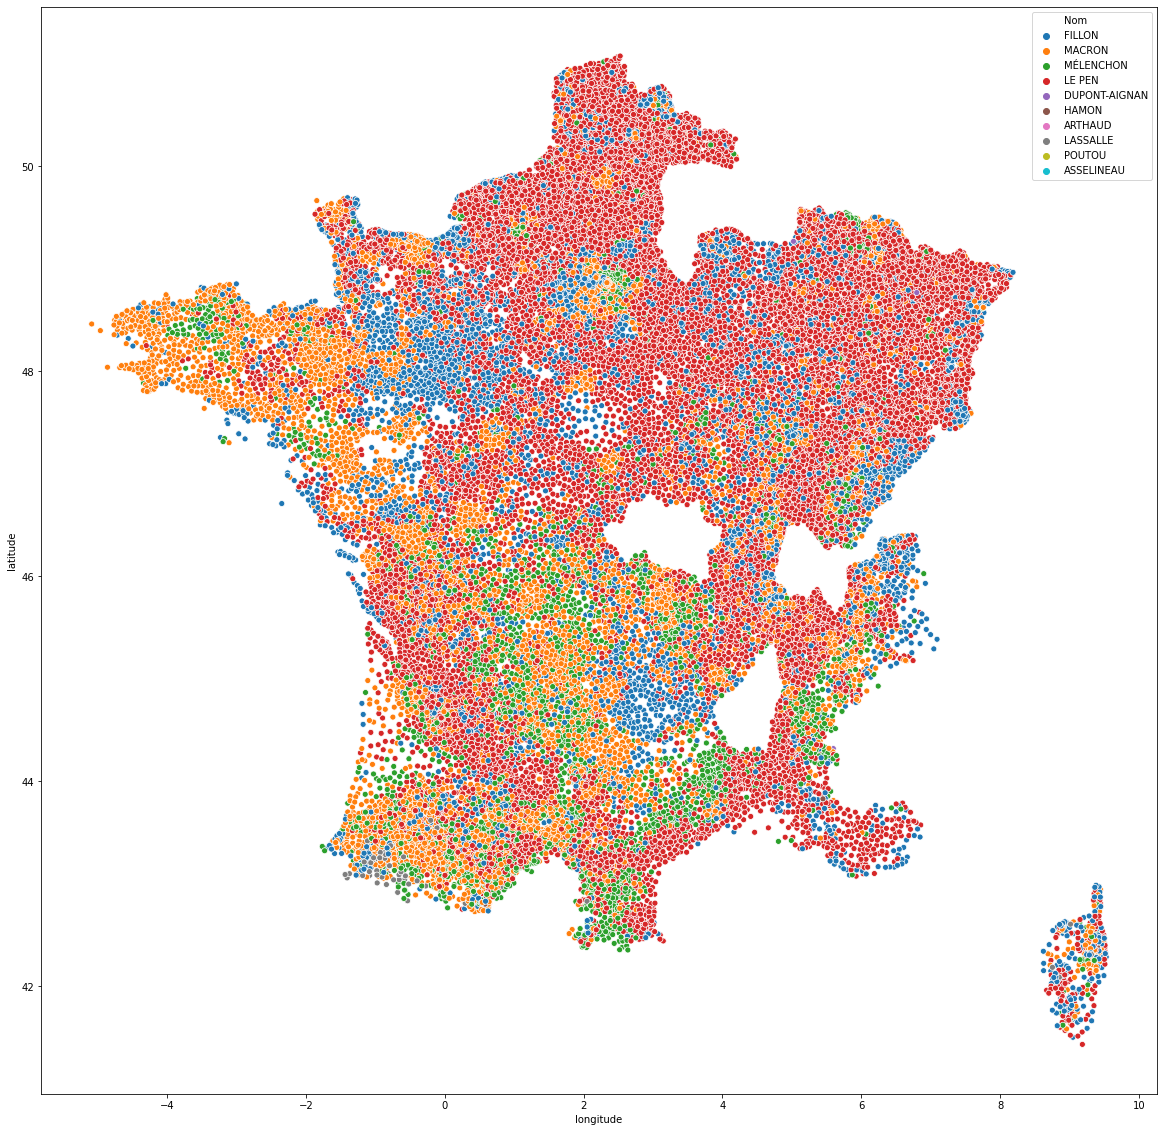

In [18]:
fig,ax =plt.subplots(1,1,figsize=(20,20))
df_base_geoloc.sort_values(['Code Insee','Voix'], ascending=[0,0]).drop_duplicates(['Code Insee'])
sns.scatterplot(data=df_base_geoloc.sort_values(['Code Insee','Voix'], ascending=[0,0]).drop_duplicates(['Code Insee']),y='latitude',x='longitude',hue='Nom')

In [19]:
df_election_bis=pd.read_excel('Presidentielle_2017_Resultats_Communes_Tour_1.xls')

In [20]:
df_election_bis.columns = list(df_election_bis.iloc[2,:])

In [21]:
df_election_bis=df_election_bis.iloc[3:,:]

In [22]:
df_election_bis

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,...,Voix,% Voix/Ins,% Voix/Exp,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp
3,1,Ain,1,L'Abergement-Clémenciat,598,92,15.38,506,84.62,2,...,2,0.33,0.4,8,M,LASSALLE,Jean,2,0.33,0.4
4,1,Ain,2,L'Abergement-de-Varey,209,25,11.96,184,88.04,6,...,0,0,0,8,M,LASSALLE,Jean,0,0,0
5,1,Ain,4,Ambérieu-en-Bugey,8586,1962,22.85,6624,77.15,114,...,40,0.47,0.62,7,M,CHEMINADE,Jacques,5,0.06,0.08
6,1,Ain,5,Ambérieux-en-Dombes,1172,215,18.34,957,81.66,21,...,5,0.43,0.54,7,M,CHEMINADE,Jacques,0,0,0
7,1,Ain,6,Ambléon,99,20,20.2,79,79.8,2,...,0,0,0,10,M,ASSELINEAU,François,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35494,ZS,Saint-Pierre-et-Miquelon,501,Miquelon-Langlade,495,226,45.66,269,54.34,5,...,2,0.4,0.77,10,M,ASSELINEAU,François,2,0.4,0.77
35495,ZS,Saint-Pierre-et-Miquelon,502,Saint-Pierre,4471,2012,45,2459,55,65,...,26,0.58,1.1,7,M,CHEMINADE,Jacques,7,0.16,0.3
35496,ZW,Wallis et Futuna,1,Wallis-Et-Futuna,8464,3053,36.07,5411,63.93,35,...,29,0.34,0.54,7,M,CHEMINADE,Jacques,18,0.21,0.34
35497,ZX,Saint-Martin/Saint-Barthélemy,701,Saint-Barthélémy,5232,2358,45.07,2874,54.93,48,...,9,0.17,0.32,7,M,CHEMINADE,Jacques,3,0.06,0.11


In [25]:
nombre_colonnes = 7
starting_candidates = 18
#df_candidates = pd.DataFrame(columns) 

In [26]:
list(df_election_bis.iloc[:4,:18+nombre_colonnes].columns)

['Code du département',
 'Libellé du département',
 'Code de la commune',
 'Libellé de la commune',
 'Inscrits',
 'Abstentions',
 '% Abs/Ins',
 'Votants',
 '% Vot/Ins',
 'Blancs',
 '% Blancs/Ins',
 '% Blancs/Vot',
 'Nuls',
 '% Nuls/Ins',
 '% Nuls/Vot',
 'Exprimés',
 '% Exp/Ins',
 '% Exp/Vot',
 'N°Panneau',
 'Sexe',
 'Nom',
 'Prénom',
 'Voix',
 '% Voix/Ins',
 '% Voix/Exp']

In [27]:
df_election_bis.iloc[:,18:18+nombre_colonnes]

,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp
3,2,F,LE PEN,Marine,126,21.07,25.45
4,2,F,LE PEN,Marine,48,22.97,27.27
5,2,F,LE PEN,Marine,1667,19.42,25.84
6,2,F,LE PEN,Marine,306,26.11,32.8
7,9,M,MÉLENCHON,Jean-Luc,19,19.19,24.68
...,...,...,...,...,...,...,...
35494,9,M,MÉLENCHON,Jean-Luc,89,17.98,34.1
35495,9,M,MÉLENCHON,Jean-Luc,844,18.88,35.6
35496,3,M,MACRON,Emmanuel,1630,19.26,30.48
35497,11,M,FILLON,François,1142,21.83,40.71


In [28]:
((df_election_bis.shape[1]-18)/7)-1

10.0

In [29]:
for i in range((int((df_election_bis.shape[1]-18)/7))-1):
    print((18+(i+1)*nombre_colonnes,18+(i+2)*nombre_colonnes))

(25, 32)
(32, 39)
(39, 46)
(46, 53)
(53, 60)
(60, 67)
(67, 74)
(74, 81)
(81, 88)
(88, 95)


In [30]:
df_test = pd.concat([df_election_bis[['Code du département',
 'Libellé du département',
 'Code de la commune',
 'Libellé de la commune',
 'Inscrits',
 'Abstentions','Blancs']],df_election_bis.iloc[:,18:18+nombre_colonnes]],axis=1)


In [31]:
for i in range((int((df_election_bis.shape[1]-18)/7))-1):
    df_test_step = pd.concat([df_election_bis[['Code du département',
 'Libellé du département',
 'Code de la commune',
 'Libellé de la commune',
 'Inscrits',
 'Abstentions','Blancs']],df_election_bis.iloc[:,18+(i+1)*nombre_colonnes:18+(i+2)*nombre_colonnes]],axis=1)
    df_test = pd.concat([df_test,df_test_step])

In [32]:
df_test.sort_values(['Libellé de la commune',],ascending=[0,1])

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp
6782,2A,Corse-du-Sud,358,Zévaco,80,23,1,5,F,ARTHAUD,Nathalie,0,0,0
6782,2A,Corse-du-Sud,358,Zévaco,80,23,1,6,M,POUTOU,Philippe,0,0,0
6782,2A,Corse-du-Sud,358,Zévaco,80,23,1,7,M,CHEMINADE,Jacques,0,0,0
6782,2A,Corse-du-Sud,358,Zévaco,80,23,1,10,M,ASSELINEAU,François,0,0,0
6782,2A,Corse-du-Sud,358,Zévaco,80,23,1,4,M,HAMON,Benoît,1,1.25,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,24,Dordogne,177,False,468,58,9,4,M,HAMON,Benoît,18,3.85,4.51
8495,24,Dordogne,177,False,468,58,9,11,M,FILLON,François,71,15.17,17.79
8495,24,Dordogne,177,False,468,58,9,9,M,MÉLENCHON,Jean-Luc,87,18.59,21.8
8495,24,Dordogne,177,False,468,58,9,3,M,MACRON,Emmanuel,91,19.44,22.81


In [38]:
df_test.head()

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp
3,1,Ain,1,L'Abergement-Clémenciat,598,92,2,2,F,LE PEN,Marine,126,21.07,25.45
4,1,Ain,2,L'Abergement-de-Varey,209,25,6,2,F,LE PEN,Marine,48,22.97,27.27
5,1,Ain,4,Ambérieu-en-Bugey,8586,1962,114,2,F,LE PEN,Marine,1667,19.42,25.84
6,1,Ain,5,Ambérieux-en-Dombes,1172,215,21,2,F,LE PEN,Marine,306,26.11,32.8
7,1,Ain,6,Ambléon,99,20,2,9,M,MÉLENCHON,Jean-Luc,19,19.19,24.68


In [ ]:
df_test[df_test['Code du département']==75]

In [37]:
df_test['Code du département'].astype(str)+df_test['Code de la commune'].astype(str)

3           11
4           12
5           14
6           15
7           16
         ...  
35494    ZS501
35495    ZS502
35496      ZW1
35497    ZX701
35498    ZX801
Length: 390456, dtype: object